# Example usage

In this notebook, I will demonstrate how to use `msions` to create MS TIC and ion plots.

## Imports

In [1]:
import msions.mzml as mzml
import msions.hardklor as hk
import msions.percolator as perc
import msions.kronik as kro
import msions.msplot as msplot
import msions.encyclopedia as encyclo
import msions.utils as msutils

In [ ]:
# extra cell used to timeout build
ms1_df = mzml.tic_df("example_files/DIA_file.mzML")

## Create DataFrame from mzML file
`tic_df` creates a pandas DataFrame of MS1 scan information from an mzML file.

In [2]:
ms1_df = mzml.tic_df("example_files/DIA_file.mzML")

It can also be used to make a DataFrame of MS2 scan information.

In [3]:
ms2_df = mzml.tic_df("example_files/DDA_file.mzML", level="2")

`peak_df` creates a pandas DataFrame containing the m/z, ion current, and retention time for all MS1 peaks.

In [4]:
ms1_peaks = mzml.peak_df("example_files/short_DDA_file.mzML")

## Read Hardklor file
`hk2df` will read a Hardklor tab-delimited file into a pandas DataFrame. After import, all columns that can be converted to a numeric data type will be.

In [5]:
hk_df = hk.hk2df("example_files/DIA_hk.hk")

`summarize_df` will summarize the TIC in each scan from a Hardklor pandas DataFrame or Hardklor tab-delimited file. 

In [6]:
hk.summarize_df(hk_df)

,rt,scan_num,TIC
0,0.0051,1,14409796
1,0.0574,152,15346213
2,0.1091,303,16216937
3,0.1607,454,16422145
4,0.2124,605,15524068
...,...,...,...
2493,99.9866,291311,108058
2494,99.9897,291312,24495
2495,99.9927,291313,51831
2496,99.9958,291314,424145


If an additional pandas DataFrame is provided with the MS1 scan information, the ion injection time will be mapped to each scan.

In [7]:
hk.summarize_df(hk_df, ms1_df)

,rt,scan_num,TIC,IT,ions
0,0.0051,1,14409796,50.000000,720489.800000
1,0.0574,152,15346213,40.343060,619113.184769
2,0.1091,303,16216937,40.586967,658196.294454
3,0.1607,454,16422145,43.578297,715649.106626
4,0.2124,605,15524068,40.905605,635021.398509
...,...,...,...,...,...
2493,99.9866,291311,108058,50.000000,5402.900000
2494,99.9897,291312,24495,50.000000,1224.750000
2495,99.9927,291313,51831,50.000000,2591.550000
2496,99.9958,291314,424145,50.000000,21207.250000


## Parse XML files from percolator output
`psms2df` will create a pandas DataFrame from a percolator XML output file.

In [8]:
psm_xml_df = perc.psms2df("example_files/short_DDA_xml.xml")

`find_precursorscan` finds the MS1 precursor scan info for a PSM scan number.

In [9]:
psm_xml_df['ms1_scan'], psm_xml_df['ms1_mz'], psm_xml_df['ms1_intensity'] = zip(*psm_xml_df['scan_num'].apply(mzml.find_precursorscan, 
                                                                                pymzml_input="example_files/DDA_file.mzML"))

In [10]:
# view part of DataFrame
psm_xml_df.filter(items=["peptide", "scan_num", "ms1_scan", "ms1_mz", "ms1_intensity"])

,peptide,scan_num,ms1_scan,ms1_mz,ms1_intensity
0,NLEAVETLGSTSTICSDK,53678,53645,962.962769,7.377221e+06
1,NLEAVETLGSTSTICSDKTGTLTQNR,53798,53759,1398.687988,5.509604e+06
2,RGTGGVDTAAVGGVFDVSNADR,53988,53950,1061.019653,7.639462e+06
3,LVRPPVQVYGIEGR,53163,53131,528.307678,1.806466e+07
4,TNVLGHLQQGGAPTPFDR,53834,53790,636.662598,2.908495e+07
5,DVIVQDDDVDCTLVEK,53403,53356,931.938538,5.971502e+06
6,EAVLYVDSQEAALK,53079,53043,768.401184,6.936950e+06
7,VLAVNQENEQLMEDYEK,53239,53188,1026.483643,4.981013e+06
8,RGTGGVDTAAVGGVFDVSNADR,53952,53918,707.682434,2.596427e+07
9,HGGYKPSDEHKTDLNPDNLQGGDDLDPNYVLSSR,53507,53470,939.189941,1.823227e+07


`id_scans` creates a column saying whether an MS2 was identified.

In [11]:
perc.id_scans("example_files/DDA_percolator.target.peptides.txt", ms2_df)

## Create a simplified DataFrame from a Kronik file
`simple_df` can be used to filter a Kronik DataFrame's rows and columns.

In [12]:
kro.simple_df("example_files/DDA_kro.kro")

,first_scan,last_scan,num_scans,mass,charge,best_int,sum_int,best_rt,mz,best_rt_s
0,87237,93951,477,841.5015,2,1.001262e+10,1.223656e+12,68.2184,421.758030,4093.104
1,229767,231799,153,2778.9350,3,4.772458e+09,5.293946e+10,170.6296,927.318947,10237.776
2,84967,89520,301,1528.7273,3,4.073246e+09,1.699650e+11,65.2467,510.583047,3914.802
3,55811,61307,397,1017.5459,2,3.582841e+09,1.497513e+11,45.0560,509.780230,2703.360
4,136654,140227,231,1832.8845,4,3.374072e+09,1.145103e+11,100.1007,459.228405,6006.042
...,...,...,...,...,...,...,...,...,...,...
269690,9803,9817,5,670.8153,1,3.194000e+03,1.340314e+04,8.4985,671.822580,509.910
269691,2151,2173,3,625.8080,1,3.131000e+03,7.133000e+03,1.8446,626.815280,110.676
269692,9749,9759,3,707.8342,1,2.969000e+03,7.321000e+03,8.4421,708.841480,506.526
269693,10130,10153,3,670.8163,1,2.841000e+03,8.072000e+03,8.8624,671.823580,531.744


`filter_df` can be used to filter a Kronik DataFrame within a retention time range.

In [13]:
kro.filter_df(kro.simple_df("example_files/DDA_kro.kro"), start=20, stop=80)

,first_scan,last_scan,num_scans,mass,charge,best_int,sum_int,best_rt,mz,best_rt_s
0,87237,93951,477,841.5015,2,1.001262e+10,1.223656e+12,68.2184,421.758030,4093.104
2,84967,89520,301,1528.7273,3,4.073246e+09,1.699650e+11,65.2467,510.583047,3914.802
3,55811,61307,397,1017.5459,2,3.582841e+09,1.497513e+11,45.0560,509.780230,2703.360
11,95191,100318,349,1307.6148,2,2.306915e+09,9.968980e+10,73.4277,654.814680,4405.662
13,100993,107030,410,1338.6983,3,2.180922e+09,1.007973e+11,76.2526,447.240047,4575.156
...,...,...,...,...,...,...,...,...,...,...
265635,22900,22951,5,729.3780,1,3.552200e+04,1.360812e+05,20.0268,730.385280,1201.608
265739,32276,32315,4,601.3448,1,3.454000e+04,1.327661e+05,27.2731,602.352080,1636.386
265799,22912,22951,4,666.8199,1,3.394100e+04,1.062795e+05,20.0365,667.827180,1202.190
266002,23322,23348,3,605.2931,1,3.231600e+04,8.552400e+04,20.3763,606.300380,1222.578


`match_rt_mass` can compare a Kronik DataFrame to itself to find redundancies.

In [14]:
kro_df = kro.simple_df("example_files/DDA_kro.kro")
redund_df = kro_df.copy()
redund_df["redund"] = redund_df.apply(kro.match_rt_mass, axis=1, other_df=kro_df, rt_diff=0.5) 

In [15]:
# view DataFrame
redund_df

,first_scan,last_scan,num_scans,mass,charge,best_int,sum_int,best_rt,mz,best_rt_s,redund
0,87237,93951,477,841.5015,2,1.001262e+10,1.223656e+12,68.2184,421.758030,4093.104,0
1,229767,231799,153,2778.9350,3,4.772458e+09,5.293946e+10,170.6296,927.318947,10237.776,0
2,84967,89520,301,1528.7273,3,4.073246e+09,1.699650e+11,65.2467,510.583047,3914.802,0
3,55811,61307,397,1017.5459,2,3.582841e+09,1.497513e+11,45.0560,509.780230,2703.360,0
4,136654,140227,231,1832.8845,4,3.374072e+09,1.145103e+11,100.1007,459.228405,6006.042,0
...,...,...,...,...,...,...,...,...,...,...,...
269690,9803,9817,5,670.8153,1,3.194000e+03,1.340314e+04,8.4985,671.822580,509.910,19
269691,2151,2173,3,625.8080,1,3.131000e+03,7.133000e+03,1.8446,626.815280,110.676,2
269692,9749,9759,3,707.8342,1,2.969000e+03,7.321000e+03,8.4421,708.841480,506.526,3
269693,10130,10153,3,670.8163,1,2.841000e+03,8.072000e+03,8.8624,671.823580,531.744,18


## Plot TIC and ions
`plot_tic` can be used to plot the TIC per MS1 scan in a pandas DataFrame.

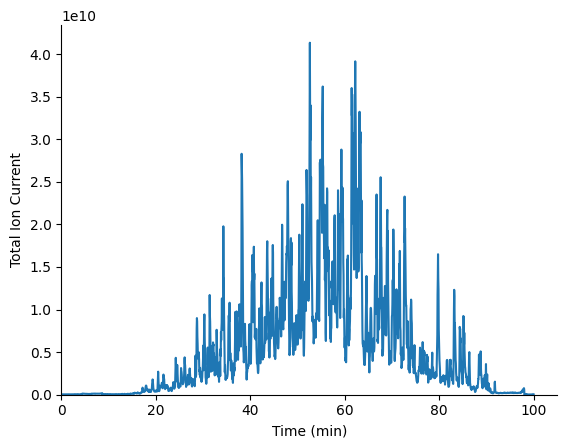

In [16]:
msplot.plot_tic(ms1_df)

`plot_ions` can be used to plot the ions per MS1 scan in a pandas DataFrame.

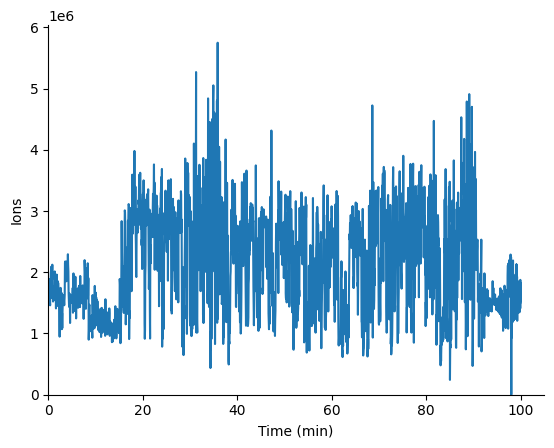

In [17]:
msplot.plot_ions(ms1_df)

## Analyze EncyclopeDIA output

`dia_df` creates a pandas DataFrame from an EncyclopeDIA elib output.

In [18]:
encyclo_df = encyclo.dia_df("example_files/DIA_elib.elib")

`match_hk` matches EncyclopeDIA elib output to Hardklor output.


In [19]:
hk_df["in_encyclo"] = hk_df.apply(encyclo.match_hk, axis=1, other_df=encyclo_df)

## Miscellaneous utility functions

`bin_list` creates a list of bin edges for a histogram.

In [20]:
# define arguments
mz_bin_size = 4
mz_bin_mult = 1.0005
mz_start = 399
mz_end = 1005

bin_mz_list = msutils.bin_list(mz_start, mz_end, mz_bin_size, mz_bin_mult)

`bin_data` bins a pandas DataFrame using list(s) of bin edges.

In [21]:
msutils.bin_data(ms1_peaks, type="mz", bin_mz_list=bin_mz_list)

,rt,bin_mz,ips
0,32.542579,"[399.0, 403.002)",1.048150e+08
1,32.542579,"[403.002, 407.004)",4.862561e+06
2,32.542579,"[407.004, 411.006)",5.346059e+06
3,32.542579,"[411.006, 415.008)",5.346583e+06
4,32.542579,"[415.008, 419.01)",7.255431e+06
...,...,...,...
5129,33.093167,"[983.292, 987.294)",2.364387e+06
5130,33.093167,"[987.294, 991.296)",2.474095e+06
5131,33.093167,"[991.296, 995.298)",3.682017e+06
5132,33.093167,"[995.298, 999.3)",3.545738e+06
